# Klasterovanje

Klasterovanje je tip nenadgledanog učenja koji se koristi za grupisanje međusobno sličnih podataka.

Često se koristi za redukciju dimenzionalnosti i detekciju autlajera.

---

## Nenadgledano učenje

Učenje funkcije koja opisuje "skrivenu" strukturu neobeleženih podataka, odnosno učenje reprezentacije podataka na osnovu primera *x* (nema *y*). Nenadgledano učenje može biti korisno za pronalaženje interesantnih veza među podacima. Ne postoji neki standardni način merenja performansi. Postupci se dele na:
* Klasterizacija/klasterovanje (*eng. clustering*) - grupisanje podataka na osnovu sličnosti
* Analiza komponenti (*eng. component analysis*) - otkrivanje najdeskriptivnijih osobina podataka
* Asocijativna pravila (*eng. association rules*) - pronalaženje uobičajenih kombinacija osobina podataka

---


### K-means

Jedan od najčešće korišćenih algoritama za nenadgledano klasterovanje podataka. Preciznije, k-means je ne-hijerarhijska metoda grupisanja sličnih podataka. K-means je tehnika koja se često koristi u tzv. *eksplorativnoj analizi podataka*.

Klasterizacija je zadatak grupisanja skupa objekata, tako da su objekti koji su u istoj grupi (odnosno *klasteru*) sličniji (u nekom smislu) jedni drugima, više nego što su slični objektima u drugim grupama (klasterima).

Pseudo-kod:

```
za svaku grupu inicijalizovati nasumično centar
dok se centri ne prestanu kretati ili ne dostigne max broj iteracija:
    pridruži svaki element grupi sa njemu najbližim centrom grupe
    pomeri centar svih grupa na osnovu novih elemenata
```

![img/kmeans.gif](img/kmeans.gif)

Za računanje distance se najčešće koristi euklidsko rastojanje.

Kako se centri inicijalizuju nasumično, K-means je stohastički algoritam.

---

## KMeans u python-u

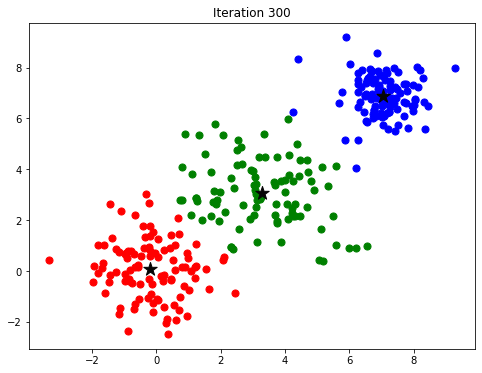

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-10, kmeans_pp=False, plot_iters=True, plot_finish=True):
        self.n_clusters = n_clusters # broj klastera
        self.max_iter = max_iter # maksimalan broj iteracija koji puštamo da se izvrši
        self.tol = tol  # tolerancija za zaustavljanje
        self.kmeans_pp = kmeans_pp # nacin inicijalizacije centroida k++ ili random

        self.plot_iters = plot_iters
        self.plot_finish = plot_finish

    def fit(self, X):
        if self.kmeans_pp: # biramo nacin inicijalizacije, k++
            self.centroids = self.kmeans_pp_init(X, self.n_clusters) # k++
        else: # random
            np.random.seed(42)
            self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        

        for i in range(self.max_iter): # dok se ne dostigne maksimalan broj iteracija
            old_centroids = np.copy(self.centroids)
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            cluster_labels = np.argmin(distances, axis=0)
            for j in range(self.n_clusters):
                self.centroids[j] = X[cluster_labels == j].mean(axis=0)
            
            # DEO ZA ISCRTAVANJE
            if self.plot_iters:
                self.plot_clusters(X, self.centroids, i)
                time.sleep(5) # promeniti za brzinu iscrtavanja

            if np.allclose(old_centroids, self.centroids, rtol=0, atol=self.tol): # ili dok se centri ne prestanu pretati
                break
            else: # DEO NEVEZAN ZA KMEANS -> KAKO NE BISMO ZATRPALI NOTEBOOK PLOTOVIMA
                if self.plot_iters:
                    clear_output(wait=True)

        if self.plot_finish:
            self.plot_clusters(X, self.centroids, self.max_iter)

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2)) # euklidska udaljenost za N dimenzija
        cluster_labels = np.argmin(distances, axis=0) # nalazimo minimalne udaljenosti
        return cluster_labels
    
    def plot_clusters(self, X, centroids, iteration):
        cluster_labels = self.predict(X)
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        plt.figure(figsize=(8, 6))
        for i in range(self.n_clusters):
            plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=50, c=colors[i])
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
        plt.title('Iteration {}'.format(iteration))
        plt.show(block=False)
        plt.close()
    
    # k++ tezi da izabere centroide koji su udaljeniji jedan od drugog  
    def kmeans_pp_init(self, X, k):
        centroids = np.empty((k, X.shape[1]))
        centroids[0] = X[np.random.choice(len(X))]
        for i in range(1, k):
            distances = np.array([min([np.linalg.norm(x-c)**2 for c in centroids[:i]]) for x in X])
            probs = distances / distances.sum()
            centroids[i] = X[np.random.choice(len(X), p=probs)]
        return centroids

np.random.seed(42)
X = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)), # menjanjem loc i scale lako dobijamo drugacije klastere
                     np.random.normal(loc=3, scale=1.5, size=(100, 2)),
                     np.random.normal(loc=7, scale=.5, size=(100, 2))])

noise = np.random.normal(loc=0, scale=.5, size=X.shape) # dodajemo sum na podatke
X_noisy = X + noise

kmeans = KMeans(n_clusters=3, plot_iters=False, kmeans_pp=True) # initialize KMeans object
kmeans.fit(X_noisy) # train the model on the data
labels = kmeans.predict(X_noisy) # predict the labels for the data
print(labels)



Za demonstraciju koristimo implementaciju [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) iz biblioteke scikit-learn.

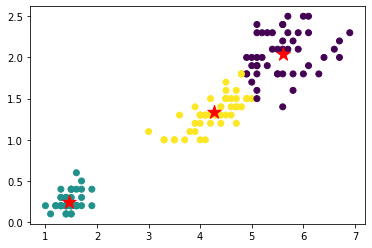

In [15]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Učitavanje dataset-a
iris = load_iris()

# Od obeležja biramo petal length and petal width
X = iris.data[:, [2, 3]]

# Kreiramo k-means model sa 3 klastera
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

# Kao rezultat dobijamo niz
# Taj niz je reprezentacija kom klasteru pripada element iz dataset-a
labels = kmeans.labels_

# Dobavljamo centroide za iscrtavanje
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.show()

#### Određivanje optimalnog K

Kako znati unapred koliko ima klastera?

Lako je videti kada su podaci dvodimenzionalni, jer ih je onda lako i vizualizovati, ali često podaci imaju (mnogo) više od samo 2 dimenzije - ovo je tzv. "kletva dimenzionalnosti" (*eng. curse of dimensionality*) u mašinskom učenju.

Određivanje optimalnog K (tj. broja klastera) je nešto se dosta proučavalo, a mi ćemo koristi tzv. "metodu lakta" (*eng. elbow method*). Za određen broj K (npr. 2, 4, 6, 8, ..., 20) se vrši klasterizacija i zatim se računa suma kvadratnih grešaka (SSE). SSE se računa tako što se unutar svakog klastera sumiraju kvadrati udaljenosti podataka od centra klastera, i zatim se sve to opet sumira. Matematički:

$ SSE = \sum_{i=1}^{K} \sum_{x \in c_{i}} dist(x, c_{i})^{2} $, gde je *dist* euklidska udaljnost.

Zatim se za sve plotuje SSE u odnosu na K, npr.:

![img/sse.png](img/sse.png)



#### Prednosti K-means

* Jednostavan i lako razumljiv
* Laka implementacija
* Relativno dobre performanse (za malo K)
* Odličan kada su klasteri sferičnog/globularnog oblika (malo formalnije hiper-sferičnog, za sfere u >3 dimenzija)

#### Mane K-means
* Potrebno unapred znati K (što je nekad teško odrediti)
* Nije deterministički - pošto se centri inicijalizuju nasumično, nekad se dobijaju drugačiji rezultati
* Osetljiv na šum
* Kada podaci nisu globularnog oblika -> beskoristan (pogledati donju sliku)
* Nema mogućnost hijerarhijskog klasterovanja (razlikovanje više manjih podklastera unutar većeg klastera)

![img/kmeans_fail.png](img/kmeans_fail.png)

---

### DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise) je takođe algoritam za klasterizaciju podataka. Ovaj postupak se zasniva na ideji grupisanja tačaka (podataka) na osnovu njihove međusobne udaljenosti. Ukoliko se tačke nalaze u tzv. *epsilon okolini* one su deo nekog klastera, u suprotnom se posmatraju kao šum.

Iako predstavljen još 1996. godine, 2014. godine na jednoj od najprestižnijih konferencija (KDD), DBSCAN je nagrađen nagradom "testa vremena", kao jedan od najviše citiranih algoritama sa ogromnom upotrebom, kako u teoriji tako i u praksi.


Opis DBSCAN algoritma:
1. Neka postoji neki skup tačaka (podataka) koje želimo da klasterizujemo. U samom postupku, razlikuju se tri vrste tačaka: ključne tačke, dostupne tačke i šum.
2. DBSCAN zahteva dva parametra: *epsilon* (eps) i *minimalni broj potrebnih tačaka koje čine region* (minPts). Epsilon okolina se najčešće računa korišćenjem euklidske udaljenosti.
3. Algoritam počinje sa proizvoljnom tačkom. Računa se epsilon okolina te tačke, i ukoliko se u njoj nalazi dovoljno tačaka (minPts), započinje se novi klaster. U suprotnom, tačka se računa kao šum. Obratiti pažnju da tačka, iako je šum, kasnije *može* biti pronađena kao deo neke druge epsilon okoline sa dovoljno tačaka i samim tim da postane deo klastera.
4. Ukoliko je za tačku određeno da pripada klasteru, sve tačke u njenoj epsilon okolini takođe pripadaju tom klasteru. Dakle, sve tačke koje su pronađene u epsilon okolini trenutne tačke se dodaju u klaster, kao i tačke koje se nalaze u epsilon okolini tih tačaka (rekurzivno). Proces se nastavlja dok se ne nađe ceo klaster, odnosno dok se ne obiđu sve tačke u epsilon okolinama. 
5. Onda se nalazi nova, prozivoljna neposećena tačka, za koju se ponavlja čitav postupak, što dovodi do otkrivanja ili novog klastera ili šuma.

![img/dbscan.png](img/dbscan.png)

Hajde da vidimo rezultat DB scan-a naspram KMeans, na sintetički generisanom skupu:

---

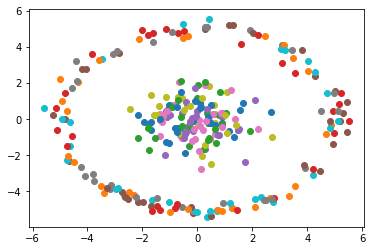

In [16]:
import numpy as np

np.random.seed(1337)

n = 150

s1 = np.ndarray(shape=(n, 2))
s2 = np.ndarray(shape=(n, 4))

data = []  # ovde se nalaze podaci, u vidu liste tacaka sa (x,y) koordinatama

plt.figure()

for i in range(n):
    x1, y1 = np.random.normal(), np.random.normal()
    s1[i] = (x1, y1)

    r2, theta2 = np.random.normal(5, 0.25), np.random.uniform(0, 2*np.pi)
    x2, y2 = r2 * np.cos(theta2), r2 * np.sin(theta2)
    s2[i] = (x2, y2, r2, theta2)

    plt.scatter(x1, y1)
    plt.scatter(x2, y2)

    data.append((x1, y1))
    data.append((x2, y2))

plt.show()

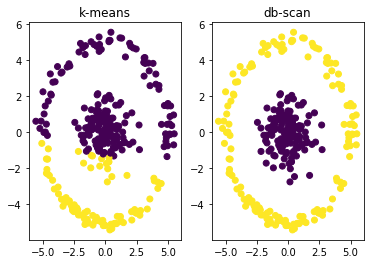

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels_kmeans = kmeans.labels_


dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(data)
labels_dbscan = dbscan.labels_

x_scatter = [point[0] for point in data]
y_scatter = [point[1] for point in data]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(x_scatter, y_scatter, c=labels_kmeans)
plt.title('k-means')

plt.subplot(1, 2, 2)
plt.scatter(x_scatter, y_scatter, c=labels_dbscan)
plt.title('db-scan')
plt.show()


#### Prednosti DBSCAN

* Nije potrebno unapred znati broj klastera (kao kod K-means)
* Klasteri mogu biti proizvoljnog oblika
* Ume da tretira šum
* Parametre epsilon i minPts je lako menjati u cilju dobijanja klastera različitih veličina i oblika, i ove parametre često podešavaju eksperti sa domenskim znanjem


#### Mane DBSCAN

* Kvalitet rezultata zavisi od toga čime se meri epsilon. Obično je to euklidska udaljenost, ali za višedimenzionalne podatke potrebne su drugačije metrike
* Kada postoje varijacije u gustini klastera, nemoguće je odrediti epsilon i minPts da odgovara svim klasterima
* U slučaju kada ne postoji ekspert sa domenskim znanjem, određivanje epsilon i minPts parametara je često dosta teško

---

## Zadaci

1. Izvršiti klasterizaciju u cilju eksplorative analize podataka nad bankovnim podacima ```data/bank.csv```.
2. Detektovati autlajere iz iris dataset-a upotrebom DBSCAN algoritma.

### Dodatni zadaci

1. Izvršiti kompresiju slike, redukcijom boja, pomoću KMeans algoritma.

## Rešenje

## 1.

          id  age     sex      region    income married  children  car  \
0    ID12101   48  FEMALE  INNER_CITY  17546.00      NO         1   NO   
1    ID12102   40    MALE        TOWN  30085.10     YES         3  YES   
2    ID12103   51  FEMALE  INNER_CITY  16575.40     YES         0  YES   
3    ID12104   23  FEMALE        TOWN  20375.40     YES         3   NO   
4    ID12105   57  FEMALE       RURAL  50576.30     YES         0   NO   
..       ...  ...     ...         ...       ...     ...       ...  ...   
595  ID12696   61  FEMALE  INNER_CITY  47025.00      NO         2  YES   
596  ID12697   30  FEMALE  INNER_CITY   9672.25     YES         0  YES   
597  ID12698   31  FEMALE        TOWN  15976.30     YES         0  YES   
598  ID12699   29    MALE  INNER_CITY  14711.80     YES         0   NO   
599  ID12700   38    MALE        TOWN  26671.60      NO         0  YES   

    save_act current_act mortgage  pep  
0         NO          NO       NO  YES  
1         NO         YES     

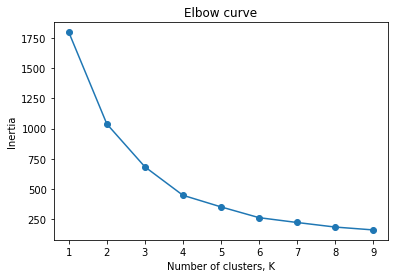

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('bank.csv')
print(data)
# Transformisanje kategoričkih obeležja
categorical_cols = ['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'pep']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Odabir kolona koje koristimo za klasterovanje
X = data[['age', 'income', 'pep']]

# Normalizacija numeričkih obeležja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sses = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    sses.append(model.inertia_)

# Crtanje elbow curve
plt.plot(range(1, 10), sses, '-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

labels = kmeans.labels_

data['cluster'] = labels

print(data['cluster'].value_counts())

1    250
0    200
2    150
Name: cluster, dtype: int64


In [11]:
# Upiši kom klasteru pripada jedno posmatranje
data['cluster'] = kmeans.labels_

# Sačuvaj novi csv
data.to_csv('bank_output_file.csv', index=False)

## 2.

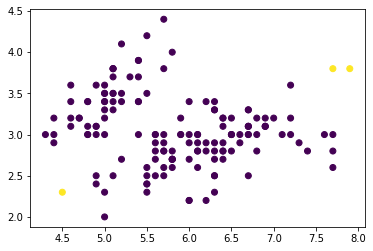

In [12]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, [0, 1]]

dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_

outliers = dbscan.labels_ == -1

plt.scatter(X[:, 0], X[:, 1], c=outliers)
plt.show()

## 3.

In [13]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np

image = Image.open('image.jpg')

X = np.array(image)

X = X.reshape(-1, 3)

kmeans = KMeans(n_clusters=16)
kmeans.fit(X)

X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = X_compressed.reshape(image.size[1], image.size[0], 3)

image_compressed = Image.fromarray(np.uint8(X_compressed))
image_compressed.save('image_compressed.jpg')